##  SCC5871 Ciência de dados
### ¨Analyzing the perception of security using images of streets¨
-----------------------------------------------------------------------
### Students (name and USP number):
 - Alexis Jesus Vargas Gutierrez       	11939710
 - Karelia Alexandra Vilca Salinas      11939727

# Data Processing

## 1. Data Exploration
### 1.1 Reading the data

All the data that we need is in the "consolidated_data.json" file, so we take a look in it. We also identify null values

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_json('Data/consolidated_data.json')
dataset = dataset.replace('NULL',np.NaN)
dataset = dataset.replace('#VALUE!',np.NaN)

In [3]:
dataset

QS Upperclass Error in QS Upperclass       Lon  \
0             4.31                   0.47  14.30900   
1              6.5                   0.61 -71.06650   
2             5.44                   0.61 -73.92490   
3             5.87                   0.61 -73.95280   
4             6.47                    0.6 -73.95840   
...            ...                    ...       ...   
4131          6.73                   0.58 -71.12300   
4132          4.42                    0.5 -73.88200   
4133          2.76                   0.29 -73.87510   
4134           4.8                   0.59  13.06033   
4135          3.82                   0.74 -73.96660   

                    File_Location Pitch Error in QS Unique Heading  \
0     /images/id_1867_400_300.jpg   NaN               0.23     NaN   
1     /images/id_4447_400_300.jpg     8               0.68     340   
2     /images/id_4026_400_300.jpg     5                0.8       7   
3     /images/id_4027_400_300.jpg    10               0.74     335   
4     /images/id_4024_400_300.jpg    12                0.7     356   
...                           ...   ...                ...     ...   
4131  /images/id_4444_400_300.jpg     2               0.72      35   
4132   /images/id_478_400_300.jpg     3               0.68     295   
4133   /images/id_479_400_300.jpg    10                NaN     201   
4134  /images/id_3199_400_300.jpg   NaN               0.14     NaN   
4135  /images/id_3729_400_300.jpg     5               0.84     298   

               City QS Unique QS Safer       Lat    ID Error in QS Safer  
0              Linz      3.39     4.31  48.27100  1867              0.53  
1            Boston      8.58     7.42  42.38090  4447              0.51  
2     New York City      3.79     4.96  40.82590  4026              0.58  
3     New York City      6.66     6.94  40.78750  4027              0.41  
4     New York City      6.29     6.36  40.77280  4024              0.58  
...             ...       ...      ...       ...   ...               ...  
4131         Boston      5.86      5.3  42.37840  4444              0.56  
4132  New York City      3.68     4.54  40.71250   478              0.41  
4133  New York City       NaN     2.61  40.68180   479              0.23  
4134       Salzburg      3.09      4.9  47.81183  3199              0.47  
4135  New York City      6.19     5.86  40.69340  3729               0.5  

[4136 rows x 13 columns]

### 1.2 Analyzing the data
We use nunique to see data that has unique values, the higher the number (closer to the total), the less relevant it is.

In [4]:
dataset.nunique()

QS Upperclass              703
Error in QS Upperclass      77
Lon                       1695
File_Location             4136
Pitch                       29
Error in QS Unique          99
Heading                    363
City                         4
QS Unique                  579
QS Safer                   653
Lat                       1698
ID                        4136
Error in QS Safer           60
dtype: int64

Next, we see the data types (numeric and categorical). We also realized that some have null data that must be covered. Some are numeric although they are recognized as an object, for example QS Upperclass.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4136 entries, 0 to 4135
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   QS Upperclass           4132 non-null   object 
 1   Error in QS Upperclass  4132 non-null   object 
 2   Lon                     4136 non-null   float64
 3   File_Location           4136 non-null   object 
 4   Pitch                   2942 non-null   object 
 5   Error in QS Unique      4118 non-null   object 
 6   Heading                 2942 non-null   object 
 7   City                    4136 non-null   object 
 8   QS Unique               4118 non-null   object 
 9   QS Safer                4131 non-null   object 
 10  Lat                     4136 non-null   float64
 11  ID                      4136 non-null   int64  
 12  Error in QS Safer       4131 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 420.2+ KB


### 1.3. Defining attributes and target
 We can notice that File location depends on the ID and both are columns with unique data, we can keep only one.

In [17]:
data = dataset[['QS Upperclass', 'Error in QS Upperclass','Lon','Pitch','Error in QS Unique','Heading','City','QS Unique','QS Safer','Lat','ID','Error in QS Safer']]
target = dataset[['QS Safer']]
id_column = dataset[['ID']]

### 1.4. Replace missing values
With the information from the data, we can classify it into numeric and categorical. We substituted the missing numerical values for average, categorical value City doesn't have missing values, so we just standardize them. 

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [19]:
# We created a vector with the name of the desired classes
features_numericos = ['QS Upperclass', 'Error in QS Upperclass','Lon','Pitch','Error in QS Unique','Heading','QS Unique','QS Safer','Lat','Error in QS Safer']
features_categoricos = ['City']
# Creating the pipelines
pipeline_numerico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

pipeline_categorico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Creating the dataset transformation:
transformacao = ColumnTransformer(
    transformers=[
        ('transformacao numerica', pipeline_numerico, features_numericos), 
        ('transformacao categorica', pipeline_categorico, features_categoricos),      
    ],sparse_threshold=0)

# Applying the transformation to the dataset::
dados_transformados = transformacao.fit_transform(dataset)#.round(2)
dados_transformados = pd.DataFrame(dados_transformados)
dados_transformados.columns = ['QS Upperclass', 'Error in QS Upperclass','Lon','Pitch','Error in QS Unique','Heading','QS Unique','QS Safer Standard','Lat','Error in QS Safer','Boston','Linz','New York City','Salzburg']
dados_transformados

QS Upperclass  Error in QS Upperclass       Lon     Pitch  \
0         -0.266080               -0.615720  1.583896  0.000000   
1          1.245433                0.792837 -0.594189  1.311876   
2          0.513833                0.792837 -0.667112  0.410536   
3          0.810614                0.792837 -0.667824  1.912769   
4          1.224728                0.692226 -0.667967  2.513663   
...             ...                     ...       ...       ...   
4131       1.404177                0.491003 -0.595630 -0.490805   
4132      -0.190159               -0.313887 -0.666017 -0.190358   
4133      -1.335873               -2.426723 -0.665841  1.912769   
4134       0.072112                0.591615  1.552040  0.000000   
4135      -0.604273                2.100783 -0.668176  0.410536   

      Error in QS Unique   Heading     QS Unique  QS Safer Standard       Lat  \
0              -3.549459  0.000000 -1.142192e+00          -0.304183  1.594157   
1               0.101585  1.677983  3.422283e+00           2.074166 -0.303968   
2               1.075197 -1.877771 -7.904020e-01           0.192900 -0.805077   
3               0.588391  1.624593  1.733691e+00           1.707090 -0.817452   
4               0.263854  1.848830  1.408286e+00           1.263539 -0.822189   
...                  ...       ...           ...                ...       ...   
4131            0.426123 -1.578789  1.030111e+00           0.452912 -0.304774   
4132            0.101585  1.197475 -8.871443e-01          -0.128292 -0.841621   
4133            0.000000  0.193749  7.811307e-16          -1.604245 -0.851515   
4134           -4.279667  0.000000 -1.406035e+00           0.147015  1.446187   
4135            1.399734  1.229509  1.320338e+00           0.881168 -0.847776   

      Error in QS Safer  Boston  Linz  New York City  Salzburg  
0              0.681450     0.0   1.0            0.0       0.0  
1              0.421877     1.0   0.0            0.0       0.0  
2              1.330382     0.0   0.0            1.0       0.0  
3             -0.875988     0.0   0.0            1.0       0.0  
4              1.330382     0.0   0.0            1.0       0.0  
...                 ...     ...   ...            ...       ...  
4131           1.070809     1.0   0.0            0.0       0.0  
4132          -0.875988     0.0   0.0            1.0       0.0  
4133          -3.212144     0.0   0.0            1.0       0.0  
4134          -0.097269     0.0   0.0            0.0       1.0  
4135           0.292090     0.0   0.0            1.0       0.0  

[4136 rows x 14 columns]

We also check if there are invalid values in the target.

In [16]:
print(np.where(np.isnan(target.astype(np.float64))))

(array([2180, 2371, 2830, 3152, 4046]), array([0, 0, 0, 0, 0]))


In [20]:
# We created a vector with the name of the desired classes
features_numericos = ['QS Safer']
# Creating the pipelines
pipeline_numerico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Creating the dataset transformation:
transformacao = ColumnTransformer(
    transformers=[
        ('transformacao numerica', pipeline_numerico, features_numericos),      
    ],sparse_threshold=0)

# Applying the transformation to the dataset::
target = transformacao.fit_transform(target)#.round(2)
target = pd.DataFrame(target)
target.columns = ['QS Safer']
target

QS Safer
0    -0.304183
1     2.074166
2     0.192900
3     1.707090
4     1.263539
...        ...
4131  0.452912
4132 -0.128292
4133 -1.604245
4134  0.147015
4135  0.881168

[4136 rows x 1 columns]

In [21]:
print(np.where(np.isnan(target.astype(np.float64))))

(array([], dtype=int64), array([], dtype=int64))


In [ ]:
#For testing
#target= target.head(5)
#dataset= dataset.head(5)
#dados_transformados= dados_transformados.head(5)

### 2. Extracting HOG values from the images

Now we are extracting the Hog values from our image dataset, and for instance, we also are looking for images that not exists in the images folder, but they have reference in our json, we can discard this cases too beacuse we dont have the image to extract the features.
We are algo skipping the images with a shape different than 640x420, in order to have the same number of features extracted.

In [22]:
import imageio
from skimage.feature import hog

In [23]:
dataimages = []
notexists= []
differentshape = []
      
for i, r in dataset.iterrows():
    id = r['ID']
    #print(str(id))
    imgpath = 'Data/images/' + 'id_' + str(id) + '_640_420.jpg'
    try:
        image = imageio.imread(imgpath)
        if image.shape != (640, 420):
            differentshape.append(id)
            next
        fd, hog_image = hog(image, orientations=8, pixels_per_cell=(20, 20),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
        dataimages.append(fd)
    except FileNotFoundError:
        notexists.append(id)

In [24]:
len(dataimages)

4136

In [25]:
dataimages=pd.DataFrame(dataimages)

We concatenate the target column, ID, standardized data, and the HOG feature vector

In [26]:
frames = [target,id_column,dados_transformados,dataimages]
result = pd.concat(frames, axis=1)
result = pd.DataFrame(result)

In [27]:
result.head(5)

QS Safer    ID  QS Upperclass  Error in QS Upperclass       Lon     Pitch  \
0 -0.304183  1867      -0.266080               -0.615720  1.583896  0.000000   
1  2.074166  4447       1.245433                0.792837 -0.594189  1.311876   
2  0.192900  4026       0.513833                0.792837 -0.667112  0.410536   
3  1.707090  4027       0.810614                0.792837 -0.667824  1.912769   
4  1.263539  4024       1.224728                0.692226 -0.667967  2.513663   

   Error in QS Unique   Heading  QS Unique  QS Safer Standard  ...      5366  \
0           -3.549459  0.000000  -1.142192          -0.304183  ...  0.451272   
1            0.101585  1.677983   3.422283           2.074166  ...  0.314868   
2            1.075197 -1.877771  -0.790402           0.192900  ...  0.360416   
3            0.588391  1.624593   1.733691           1.707090  ...  0.218405   
4            0.263854  1.848830   1.408286           1.263539  ...  0.248966   

       5367      5368      5369      5370      5371      5372      5373  \
0  0.329780  0.391014  0.425223  0.382203  0.213866  0.425223  0.259303   
1  0.340324  0.388036  0.250702  0.294815  0.388036  0.388036  0.388036   
2  0.360416  0.399483  0.238676  0.244903  0.399483  0.399483  0.399483   
3  0.382663  0.394275  0.297484  0.231434  0.394275  0.394275  0.394275   
4  0.371956  0.409188  0.159422  0.409188  0.409188  0.409188  0.252007   

       5374      5375  
0  0.425223  0.213564  
1  0.312048  0.388036  
2  0.291761  0.399483  
3  0.284036  0.394275  
4  0.271849  0.409188  

[5 rows x 5392 columns]

### 3. Delete invalid images

Now that we have our data with the features extracted, we can notice that come features have a value close to "0.0", this indicates that the images are bad loaded (bad downloaded from google) so we need to discard those images from our dataset

In [29]:
for i, r in result.iterrows():
    if sum(np.array(r[16:]).astype(np.float64)) < 100:
        result = result.drop([i])

Our finished dataset contains 3172 images and for each image we have 13 rows with necessary information, and 5376 features.

Save the data and define the new characteristics and target

In [30]:
result.to_csv(r'Data/clean_data.csv', index = False, header=True)


In [ ]:
#result = pd.read_csv('Data/clean_data.csv')

In [52]:
new_data   = result.iloc[:,2:]
new_id   = result[['ID']]
new_target = result[['QS Safer']]

### 4. Dimensionality reduction

We can get a list of the columns of our Dataset:

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.8)
principalComponents = pca.fit_transform(new_data)
principal_data = pd.DataFrame(principalComponents)
#print('Explained variance ratio: ', pca.explained_variance_ratio_)
#print('EVR acumulado, o último elemento verifica se mantém pelo menos 80% ',pca.explained_variance_ratio_.cumsum())
#print('Singular values: ',pca.singular_values_)
#print('Eixos principais')
#principal_data


## 5. Converting numerical data to binary

Set traditional configuration

In [58]:
X = np.array(principal_data.astype(np.float64))
Y = np.array(new_target.astype(np.float64))

Receive a percentage for the delta percentile. Sort the row in a new Y_sort choose the element that is in the indicated position. That element serves as a reference point, iterates through the Y and compares, creates a binary Y_new with values safe (1) or insecure (-1).

In [59]:
Y_sort = np.array(Y)
Y_sort.sort()
Y_new = np.zeros(Y_sort.size)
def define_delta(delta):
    #choose the index that matches the percentage
    i_delta=int(np.floor(Y_sort.size*delta/100))
    element = Y_sort[i_delta]
    #compare for create binary array 
    for i in range(Y.size):
        if Y[i]<element:
            Y_new[i]=0
        else:
            Y_new[i]=1
    return Y_new

Previous experiments showed us that an optimal delta is 30%, so we will use it as a reference to establish an image as safe or not.

In [60]:
Y_new= define_delta(30)

In [61]:
len(principal_data)

3176

Concatenate binary target, real target, ID and PCA data

In [62]:
unified_data = pd.DataFrame(data=np.c_[Y_new,Y,new_id, X])
unified_data.head(5)

0         1       2         3         4         5         6         7    \
0  1.0  2.074166  4447.0 -2.671833  3.407773 -2.140985  0.666594 -0.899304   
1  0.0  0.192900  4026.0 -1.540614 -0.482552 -0.014158 -1.675509  0.123980   
2  1.0  1.707090  4027.0 -3.352913  1.466855 -1.255014 -0.158968  1.694080   
3  1.0  1.263539  4024.0 -2.556131  2.115157  0.013346 -2.011180  0.605605   
4  0.0  0.108778  4025.0 -1.944644 -0.254486 -1.458049 -1.707821  0.896419   

        8         9    ...       634       635       636       637       638  \
0 -0.802410 -1.789204  ... -0.212964 -0.237374  0.234456  0.366502 -0.033669   
1 -0.551405  1.420673  ... -0.098051 -0.062642 -0.250532  0.168726  0.275602   
2 -0.267765 -1.732989  ...  0.269355 -0.079640  0.090658 -0.078661  0.148773   
3 -0.505135 -2.249314  ... -0.015539 -0.068612  0.160083 -0.019825 -0.108341   
4 -0.102616  1.810616  ... -0.015247  0.109667  0.018364 -0.003845  0.080666   

        639       640       641       642       643  
0  0.074911 -0.020853  0.153692 -0.025604  0.000220  
1 -0.167429 -0.167424 -0.235101  0.102897 -0.022786  
2 -0.023570  0.037278  0.092564 -0.122592  0.074608  
3 -0.129574  0.208353  0.075461 -0.032274  0.032281  
4 -0.218191 -0.041843  0.124349  0.016106 -0.161878  

[5 rows x 644 columns]

## 5. Balancing data

In [63]:
unified_data[0].value_counts()

0.0    2299
1.0     877
Name: 0, dtype: int64

In [129]:
classe_0 = unified_data[unified_data.iloc[:,0] == 0]
classe_1 = unified_data[unified_data.iloc[:,0] == 1]
unified_data = pd.concat([classe_0, classe_1.sample(n=2299, replace=True)])

X_final, y_final, id_final= unified_data.iloc[:, 3:], unified_data.iloc[:,0], unified_data.iloc[:,2]

unified_data[0].value_counts()

1.0    2299
0.0    2299
Name: 0, dtype: int64

In [131]:
#Save data
unified_data.to_csv(r'Data/ready_data.csv', index = False, header=True)

Normalize input variables

In [132]:
from sklearn.preprocessing import MinMaxScaler
X_final = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_final).astype('float64')
y_final = y_final.astype('int')
id_final = id_final.astype('int')

# Classification


In [166]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import mean_squared_error
from numpy import mean, std
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

Evaluate the accuracy of the models.

In [138]:
def evaluate_model(model, X, y):
    target_y=np.array(y).astype(np.float64)
    scores = []
    kf = KFold(n_splits=3)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = target_y[train_index], target_y[test_index]
        #Normal Accuracy
        model.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, model.predict(X_test)))
    return np.mean(scores)

In [139]:
print(X_final)

[[0.27591341 0.3449397  0.45531059 ... 0.29962889 0.56713479 0.47646435]
 [0.24152411 0.36311999 0.29860563 ... 0.59884349 0.49333513 0.34526873]
 [0.24597651 0.30187408 0.36264633 ... 0.52290392 0.46769913 0.5438542 ]
 ...
 [0.16199071 0.61444589 0.32602346 ... 0.56064275 0.68876279 0.69241766]
 [0.43150641 0.53367815 0.74962986 ... 0.62543806 0.51969599 0.73393661]
 [0.24816645 0.43791798 0.470223   ... 0.53060851 0.38184366 0.34977683]]


## Experiments
### Experiment #1
3 SVM and 3 MLP settings are tested for 30% delta value.

In [140]:
table1 = { 
    "SVC kernel sigmoid" : SVC(kernel='sigmoid'),
    "SVC kernel poly grau 3" : SVC(kernel='poly', degree=3),
    "SVC kernel linear" : SVC(kernel='linear'),
    "MLP camada escondida (5,) max_iter = 5000" : MLPClassifier(hidden_layer_sizes=(5,),max_iter=5000),
    "MLP camada escondida (5,5) max_iter = 3500" : MLPClassifier(hidden_layer_sizes=(5,5),max_iter=3500),
    "MLP camada escondida (13,17) max_iter = 3500" : MLPClassifier(hidden_layer_sizes=(13,17),max_iter=3500)    
}
for nome, modelo in table1.items():
    print(nome, '-->', evaluate_model(modelo, X_final, y_final)* 100, '%')

SVC kernel sigmoid --> 16.65579473798652 %
SVC kernel poly grau 3 --> 91.7359148912495 %
SVC kernel linear --> 89.90901927255159 %
MLP camada escondida (5,) max_iter = 5000 --> 90.19157587328837 %
MLP camada escondida (5,5) max_iter = 3500 --> 64.16535664184005 %
MLP camada escondida (13,17) max_iter = 3500 --> 92.8884528762922 %


### Experiment #2
Different MLP settings are tested for a 30% delta that is almost intermediate.

In [142]:
table2 = { 
    "MLP camada escondida (4000,2000,1000,500,250)  " : MLPClassifier(hidden_layer_sizes=(4000,2000,1000,500,250)),
    "MLP camada escondida (8000,4000,2000)  " : MLPClassifier(hidden_layer_sizes=(4000,2000,1000,500,250)),
    "MLP camada escondida (10000,5000)" : MLPClassifier(hidden_layer_sizes=(100,100)),     
    "MLP camada escondida (500,500)  " : MLPClassifier(hidden_layer_sizes=(50,50)),
    "MLP camada escondida (100,100)" : MLPClassifier(hidden_layer_sizes=(100,100)), 
    "MLP camada escondida (1000,50)  " : MLPClassifier(hidden_layer_sizes=(20,20)),
    "MLP camada escondida (50,50)  " : MLPClassifier(hidden_layer_sizes=(50,50)),
    "MLP camada escondida (20,20)  " : MLPClassifier(hidden_layer_sizes=(20,20)),  
}
for nome, modelo in table2.items():
    print(nome, '-->', evaluate_model(modelo, X_final, y_final)* 100, '%')

MLP camada escondida (4000,2000,1000,500,250)   --> 62.62066279591942 %
MLP camada escondida (8000,4000,2000)   --> 60.924272900738444 %
MLP camada escondida (10000,5000) --> 90.23446747703696 %
MLP camada escondida (500,500)   --> 92.95365606213633 %
MLP camada escondida (100,100) --> 88.32237056869555 %


/home/karelia/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/karelia/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/karelia/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP camada escondida (1000,50)   --> 89.06116495980224 %
MLP camada escondida (50,50)   --> 85.77815474700198 %


/home/karelia/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/karelia/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP camada escondida (20,20)   --> 91.38802736660314 %


### Experiment #3
10-fold validation, for different methods, and ROC curve analysis
Methods tested:
- Perceptron
- Multi-layer Perceptron classifier: 15 hidden layers
- C-Support Vector Classification
- Decision tree classifier
- k-nearest neighbors: 5

In [153]:
classificadores = {
  "Perceptron" : {"modelo": Perceptron(), "scores": []},
  "Multi-Layer Perceptron (15,)" : {"modelo": MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000), "scores": []},
  "SVM Polinomial Grau 3" : {"modelo": SVC(kernel='poly', degree=3, gamma=1), "scores": []},
  "Árvore Decisão Critério Gini" : {"modelo": DecisionTreeClassifier(criterion='gini'), "scores": []},  
  "KNN k=5" : {"modelo": KNeighborsClassifier(n_neighbors=5), "scores": []}
}
for teste in classificadores:
    clf = classificadores[teste]    
    skf = StratifiedKFold(n_splits=10)
    scores = []
    target = np.array(y_final)
    for train_index, test_index in skf.split(X_final, target):      
      X_train, X_test = X_final[train_index], X_final[test_index]
      y_train, y_test = target[train_index], target[test_index]
      clf["modelo"].fit(X_train, y_train)
      y_pred = clf["modelo"].predict(X_test)      
      # scores.append(precision_score(y_test, y_pred,labels=[-1, 0, 1], average='macro', zero_division=0))
      scores.append(balanced_accuracy_score(y_test, y_pred))
    classificadores[teste]["scores"] = scores

for clas in classificadores:
  print(clas, ':\t', np.mean(classificadores[clas]['scores']))

Perceptron :	 0.9441228403265616
Multi-Layer Perceptron (15,) :	 0.9606407822289731
SVM Polinomial Grau 3 :	 0.9593383330168977
Árvore Decisão Critério Gini :	 0.923239035504082
KNN k=5 :	 0.7699107651414467


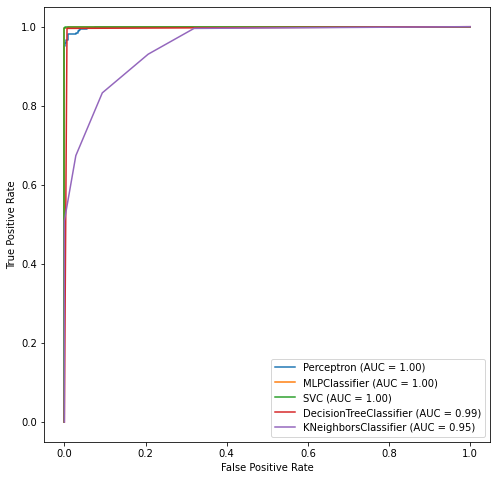

In [154]:
from sklearn import model_selection, metrics

fig, ax = plt.subplots(figsize=(8,8))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_final, np.array(y_final), test_size=0.2, random_state=42, stratify= np.array(y_final))
for clas in classificadores:
  metrics.plot_roc_curve(classificadores[clas]['modelo'], X_test, y_test, ax = ax)

## Evaluation measure

As the task is a classification, the rate of examples is considered
correctly classified. The measure of performance is accuracy. For best results, the data must be balanced.

Being a binary classification, a confusion matrix can also be applied to obtain false positives and false negatives. And therefore, we can calculate the rate of false positives (cost), the rate of false negatives and the taza of true positives (benefit)

### Experiment #4
10-fold validation, for different methods, mean ROC curve for each method and confusion matrices.
Methods tested:
- Perceptron
- Multi-layer Perceptron classifier: 15 hidden layers
- C-Support Vector Classification
- Decision tree classifier
- k-nearest neighbors: 3, 5 and 7

In [195]:
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.metrics import auc
warnings.filterwarnings('ignore')

def classificacao(data, columns, target, score=balanced_accuracy_score, score_name='acurácia', 
                  folds=5, plot=True):

    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    mlp = MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000)    
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    

    clfs = [prcp, mlp, svm_n, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron','mlp15' ,'svm_poly', 'dt', '3nn', '5nn', '7nn']
    colors = ['c','m','y','b','g','r','indigo']
    
    # Initializes structures for confusion matrices
    confusion_matrices = {
        'perceptron':np.array([[0,0],[0,0]]),
        'mlp15':np.array([[0,0],[0,0]]),
        'svm_poly':np.array([[0,0],[0,0]]),
        'dt':np.array([[0,0],[0,0]]),
        '3nn':np.array([[0,0],[0,0]]),
        '5nn':np.array([[0,0],[0,0]]),
        '7nn':np.array([[0,0],[0,0]])
    }

    # prepares cross-validation
    # divides the dataset into fold parts
    cv = KFold(n_splits=folds, shuffle=True)
    
    # iterates for each classifier doing training and testing
    results = {'perceptron':[], 'mlp15':[], 'svm_poly':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    #ROC general
    color_id = 0
    fig, ax = plt.subplots(figsize=(8,8))
    for c, c_name in zip(clfs, clfs_names):
        #ROC mean curve aux 
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
        for train_index, test_index in cv.split(data):
            
            # separates training and test set
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # do the model training
            clf = c.fit(X=x_train, y=y_train)
            
            # values predicted by the classifier
            y_pred = clf.predict(x_test)
            # true labels converted to array
            y_test = np.array(y_test)
            
            # performs prediction on the test set and saves the result
            results[c_name].append( score(y_test, y_pred) )
            confusion_matrices[c_name] += confusion_matrix(y_test, y_pred)    
            #ROC curve 
            viz = metrics.plot_roc_curve(clf, x_test, y_test,label=None, color=colors[color_id],alpha=0.3, lw=1, ax = ax)
            interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(viz.roc_auc)
        #ROC mean curve
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        ax.plot(mean_fpr, mean_tpr, color=colors[color_id],
                label=r'Mean %s (AUC = %0.2f $\pm$ %0.2f)' % (c_name,mean_auc, std_auc),
                lw=2, alpha=.8)

        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                        label=None)
        color_id=color_id+1
    #ROC general
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
        label='Chance', alpha=.8)
    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Performance of average classifiers")
    ax.legend(loc="lower right")
    plt.show()
    
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # plots the classifiers performance
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Classifier performance - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs, 'confusion_matrices': confusion_matrices}

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


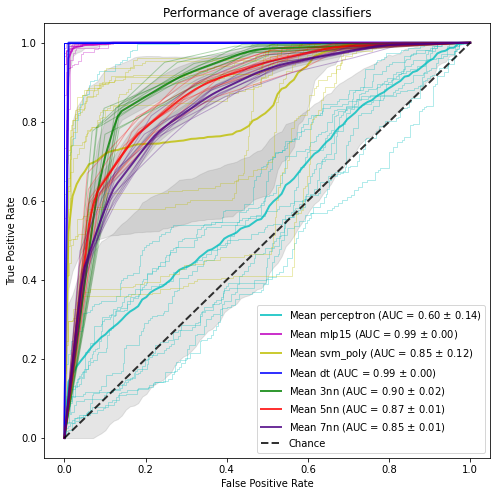

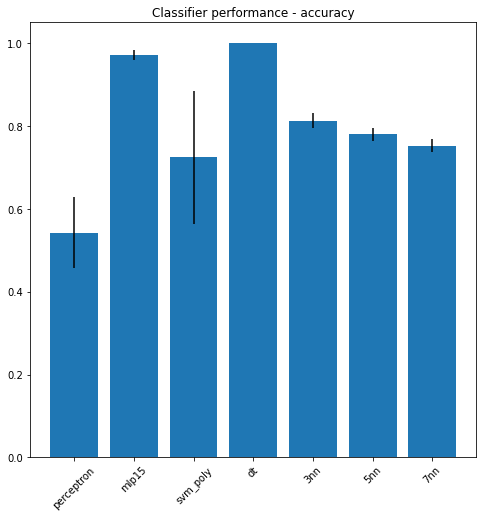

{'results': {'perceptron': [0.5,
   0.5543478260869565,
   0.508695652173913,
   0.5152173913043478,
   0.49130434782608695,
   0.4826086956521739,
   0.5195652173913043,
   0.5152173913043478,
   0.7886710239651417,
   0.55119825708061],
  'mlp15': [0.9739130434782609,
   0.9521739130434783,
   0.9760869565217392,
   0.95,
   0.9760869565217392,
   0.9782608695652174,
   0.9869565217391304,
   0.9608695652173913,
   0.9869281045751634,
   0.9673202614379085],
  'svm_poly': [0.8913043478260869,
   0.8978260869565218,
   0.45217391304347826,
   0.8804347826086957,
   0.6195652173913043,
   0.7478260869565218,
   0.6217391304347826,
   0.508695652173913,
   0.8997821350762527,
   0.7233115468409586],
  'dt': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  '3nn': [0.8478260869565217,
   0.7913043478260869,
   0.8152173913043478,
   0.7934782608695652,
   0.841304347826087,
   0.7956521739130434,
   0.8021739130434783,
   0.8152173913043478,
   0.8126361655773421,
   0.81263616557734

In [196]:
clas=classificacao(unified_data, np.arange(0, 643).tolist(), 0, score=accuracy_score, score_name='accuracy', 
                  folds=10, plot=True)
clas

We can see that the methods that give better results are:
- Decision tree classifier
- Multi-layer Perceptron classifier
The one that presents a low performance is Perceptron, it is also very dispersed, some experiments exceed the Chance line.

####  Analysis of confusion matrices

In [197]:
def medidas_ava(confusion_matrices):
  for i in confusion_matrices:
    vp = confusion_matrices[i][0][0]
    fn = confusion_matrices[i][0][1]
    fp = confusion_matrices[i][1][0]
    vn = confusion_matrices[i][1][1]
    tfp=fp/(fp+vn)
    tfn=fn/(vp+fn)
    tvn=vn/(vn+fp)
    tvp=vp/(vp+fn)
    print(i)
    print('  TFP-Custo: ',tfp)
    print('  TFN-ErroII: ',tfn)
    print('  TVN: ',tvn)
    print('  TVP-Benefício: ',tvp)
    print('  Benefício/Custo: ',tvp/tfp)
medidas_ava(clas['confusion_matrices'])

perceptron
  TFP-Custo:  0.38321009134406264
  TFN-ErroII:  0.5315354501957372
  TVN:  0.6167899086559374
  TVP-Benefício:  0.4684645498042627
  Benefício/Custo:  1.2224744608399545
mlp15
  TFP-Custo:  0.006089604175728578
  TFN-ErroII:  0.05219660722053066
  TVN:  0.9939103958242714
  TVP-Benefício:  0.9478033927794693
  Benefício/Custo:  155.64285714285714
svm_poly
  TFP-Custo:  0.2496737712048717
  TFN-ErroII:  0.3018703784254024
  TVN:  0.7503262287951283
  TVP-Benefício:  0.6981296215745977
  Benefício/Custo:  2.7961672473867596
dt
  TFP-Custo:  0.0
  TFN-ErroII:  0.0
  TVN:  1.0
  TVP-Benefício:  1.0
  Benefício/Custo:  inf
3nn
  TFP-Custo:  0.08177468464549804
  TFN-ErroII:  0.29273597216180947
  TVN:  0.9182253153545019
  TVP-Benefício:  0.7072640278381905
  Benefício/Custo:  8.648936170212766
5nn
  TFP-Custo:  0.10526315789473684
  TFN-ErroII:  0.3353632013919095
  TVN:  0.8947368421052632
  TVP-Benefício:  0.6646367986080904
  Benefício/Custo:  6.31404958677686
7nn
  TFP-Cust

The best classifier is Decision tree classifier, as it has a larger 'tvp' than the others, which means that it has a greater benefit or a large number of true positives. It also does not have tfp, that is, it does not have false positives. The benefit / cost ratio may be divided by zero if the benefit rate exceeds the cost rate.

The rate of their 'tfn' false negatives is also low, but in the case of Decision tree classifier and Multi-layer Perceptron classifier. In the case of 'tvn', in the majority of cases the same as 'tvp' is to be expected to be a balanced set, in addition to the reason to decrease the cost.

In conclusion, the false rate is low and the true rate is high. This means that the classification was correct for most cases (most true, positive or negative), and there was an error in a low percentage (minus false numbers).

# Visualization

Using dimensionality reduction techniques, we can visualize the images of cities on a two-dimensional plane, to assess whether there is any relationship between safe or unsafe images. We will use two dimensional reduction techniques to obtain the x and y coordinates for each image from the 641 columns of the processed data.

In [203]:
pd.DataFrame(X_final).head(5)

0         1         2         3         4         5         6    \
0  0.275913  0.344940  0.455311  0.303301  0.312160  0.295276  0.697122   
1  0.241524  0.363120  0.298606  0.300120  0.374556  0.331546  0.762816   
2  0.245977  0.301874  0.362646  0.398916  0.397212  0.393834  0.223912   
3  0.714097  0.174782  0.396624  0.266300  0.256160  0.584135  0.347324   
4  0.613293  0.342369  0.476727  0.243588  0.184354  0.297382  0.745126   

        7         8         9    ...       631       632       633       634  \
0  0.644244  0.404794  0.307784  ...  0.359453  0.442098  0.224017  0.631835   
1  0.420203  0.424365  0.463718  ...  0.434216  0.563389  0.430541  0.476695   
2  0.458519  0.343885  0.444691  ...  0.478456  0.390904  0.317865  0.352937   
3  0.433111  0.248443  0.467865  ...  0.295758  0.485721  0.272918  0.658041   
4  0.591662  0.349363  0.490629  ...  0.614602  0.406023  0.452007  0.600931   

        635       636       637       638       639       640  
0  0.702057  0.344492  0.323655  0.299629  0.567135  0.476464  
1  0.551812  0.303608  0.437041  0.598843  0.493335  0.345269  
2  0.372561  0.482724  0.564083  0.522904  0.467699  0.543854  
3  0.524389  0.563858  0.590265  0.348042  0.290179  0.629998  
4  0.567842  0.551306  0.557669  0.497704  0.472351  0.499059  

[5 rows x 641 columns]

## TSNE

We apply the t-distributed Stochastic Neighbor Embedding technique to go from 641 to 2 columns

In [243]:
from sklearn.manifold import TSNE
tsne_2d = TSNE(n_components=2).fit_transform(pd.DataFrame(X_final))
tsne_2d = pd.DataFrame(tsne_2d)
tsne_2d

0          1
0     20.819075  -4.197591
1      8.331180   5.753893
2     -6.161116   6.684345
3     -0.388220  -8.212749
4     36.657688   8.032162
...         ...        ...
4593  -8.361570 -59.111839
4594 -85.244255 -64.077515
4595 -38.642265  14.674166
4596  54.404591 -19.214018
4597  55.388523 -32.481213

[4598 rows x 2 columns]

We take the relevant data to visualize. That is, the security tag 'QS Safer', the location of the image 'File_Location' that is obtained from its ID and the coordinates obtained as 'cx' and 'cy'

In [250]:
vis_tsne = pd.DataFrame(data=np.c_[y_final,id_final.astype('str'), tsne_2d/2])
vis_tsne.columns = ['QS Safer','File_Location','cx','cy']
vis_tsne

QS Safer File_Location       cx       cy
0           0          4026  10.4095  -2.0988
1           0          4025  4.16559  2.87695
2           0          4021 -3.08056  3.34217
3           0          4028 -0.19411 -4.10637
4           0          4029  18.3288  4.01608
...       ...           ...      ...      ...
4593        1          3710 -4.18079 -29.5559
4594        1          1451 -42.6221 -32.0388
4595        1          4303 -19.3211  7.33708
4596        1          2155  27.2023 -9.60701
4597        1          1129  27.6943 -16.2406

[4598 rows x 4 columns]

In [251]:
vis_tsne.to_json("WEB/vis_tsne.ndjson",
           orient="records")

The visualization tool is a web page, using D3.js. The images are shown in a 2D space, with the mouse you can determine a box and select images to explore better.
Insecure images have a red margin and secure images blue.

In the case of TSNE (https://kareliavs.gitlab.io/final-project-data-science/WEB/TSNE1.html) we can see how the concentration of unsafe images in the center and another group on the outside.
Images considered safe are scattered. We can verify that with the reduction of dimensionality it is possible to identify groups. Also when selecting a box we can see that there are some images repeated by the previous data balancing. At a glance it can be seen in the box and in the 'Selected' section, that the images labeled as unsafe have the particularity of being images of streets, industrial centers and with little care, also little arborization, this is the object of future research .

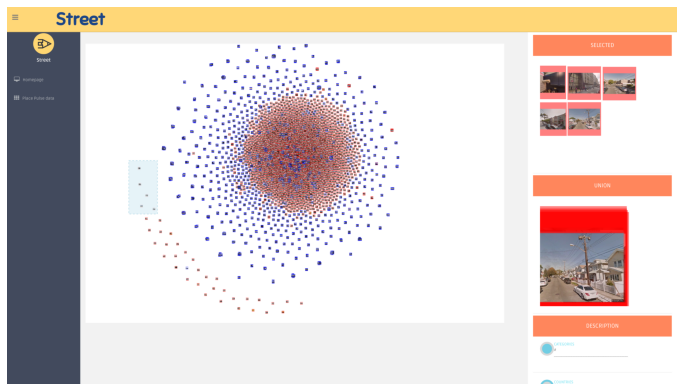

In [254]:
tsne_screen = imageio.imread('Data/TSNE.png')
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(tsne_screen)

## PCA

We apply the Principal component analysis technique to move to two dimensions. We save the security data, ID and coordinates.

In [208]:
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_2d = pca_2d.fit_transform(pd.DataFrame(X_final))
pca_2d = pd.DataFrame(pca_2d)
pca_2d

0         1
0     0.138040 -0.034909
1     0.092809 -0.039911
2    -0.018140 -0.037028
3    -0.132115  0.112775
4     0.019512  0.125168
...        ...       ...
4593  0.030755  0.099816
4594 -1.223916  0.928689
4595 -0.090900 -0.071090
4596  0.026797 -0.026608
4597  0.050621  0.012436

[4598 rows x 2 columns]

In [239]:
vis = pd.DataFrame(data=np.c_[y_final,id_final.astype('str'), pca_2d*100])
vis.columns = ['QS Safer','File_Location','cx','cy']
vis

QS Safer File_Location       cx       cy
0           0          4026   13.804 -3.49095
1           0          4025  9.28089 -3.99111
2           0          4021   -1.814 -3.70275
3           0          4028 -13.2115  11.2775
4           0          4029  1.95123  12.5168
...       ...           ...      ...      ...
4593        1          3710  3.07552   9.9816
4594        1          1451 -122.392  92.8689
4595        1          4303 -9.08996 -7.10903
4596        1          2155  2.67967 -2.66081
4597        1          1129  5.06207   1.2436

[4598 rows x 4 columns]

In [240]:
vis.to_json("WEB/vis.ndjson",
           orient="records")

Using the same tool created, we display the data with PCA (https://kareliavs.gitlab.io/final-project-data-science/WEB/PCA1.html ). In this case, a concentration of safe images can be seen in the center, but towards the sides, it becomes scattered, without having a clear distinction of groups. We can conclude that TSNE better differentiates the sets.

In the selected box we can see images repeated by balancing and see the particularity that the images perceived as safe have a greater presence of vegetation.

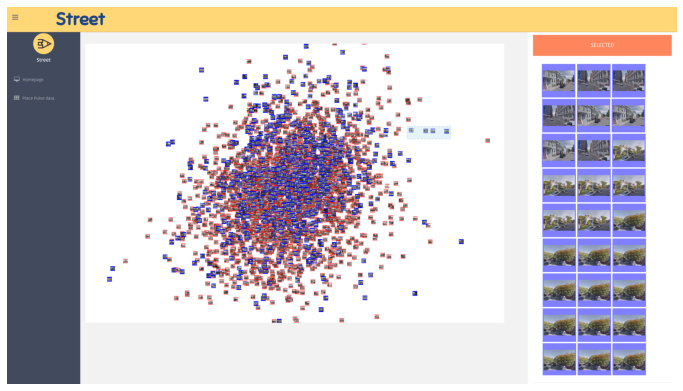

In [255]:
pca_screen = imageio.imread('Data/PCA.png')
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(pca_screen)